In [198]:
# Import required libraries

import warnings
import time
import pickle

import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    matthews_corrcoef,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

# Suppress warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


In [199]:
pds.set_option('display.max_columns', None)     # display all columns
pds.set_option('display.width', 200)

# TODO: Load your dataset
wine_data_set = pds.read_csv("wine_quality.csv")
print(wine_data_set)

print(wine_data_set.columns)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality_tier
0               6.6              0.32         0.45             4.4      0.071                   39                   145   0.9926  2.93       0.55     11.0             2
1               9.2              0.45         0.00             1.7      0.094                    3                    21   0.9938  3.57       0.35     10.4             2
2               6.5              0.31         0.49            17.6      0.059                   42                    94   1.0006  3.32       0.44     12.2             3
3               7.3              0.11         0.33             4.4      0.080                   36                   149   0.9924  2.91       0.56      9.4             2
4               6.3              0.35         0.41            32.0      0.070                   27                   219   0.9935  3.25       0.29    

In [200]:
X = wine_data_set.iloc[:,:-1]
y = wine_data_set[["quality_tier"]]

X_TrainData,X_TestData,y_TrainData,y_TestData = train_test_split(X,y,random_state=42,test_size=0.2)

print(X_TrainData.head(10))
print(y_TrainData.head(10))
print(X_TestData.head(10))
print(y_TestData.head(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol
1916            4.9              0.34         0.14            15.8      0.063                   56                   111   0.9901  3.27       0.72      9.4
947             6.4              0.52         0.41             7.6      0.012                    2                   163   0.9902  3.43       0.39      9.7
877             5.3              0.39         0.46             3.5      0.024                   37                   129   0.9942  3.32       0.40      8.8
2927            7.1              0.21         0.29            17.4      0.044                   38                   119   0.9909  3.18       0.51     12.2
6063           10.7              0.67         0.15             1.2      0.133                   15                    77   0.9970  3.55       0.85     10.0
293             6.8              0.25         0.18            65

In [201]:
print(wine_data_set.isna().sum())
print("\n")
print("No Null Values")

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_tier            0
dtype: int64


No Null Values


In [202]:
def detect_outliers(data, name):
    data = np.array(data)
    data = data[~np.isnan(data)]   # remove NaNs

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    detected_outliers = data[(data < lower_limit) | (data > upper_limit)]

    print(f"\n====== {name.upper()} ======")
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower Bound:", lower_limit)
    print("Upper Bound:", upper_limit)
    print("Outliers:", detected_outliers)


In [203]:
# List of columns I want to analyze in train_data_set
iqr_total_columns = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid',
    'residual sugar', 
    'chlorides', 
    'free sulfur dioxide',
    'total sulfur dioxide', 
    'density', 
    'pH', 
    'sulphates', 
    'alcohol'

]

# Loop through each column and compute outliers
for col in iqr_total_columns:
    detect_outliers(X_TrainData[col], col)

# List of columns I want to analyze in test_data_set

for col in X_TestData.columns:
    detect_outliers(X_TestData[col], col)


====== FIXED ACIDITY ======
Q1: 6.4
Q3: 7.8
IQR: 1.3999999999999995
Lower Bound: 4.300000000000001
Upper Bound: 9.899999999999999
Outliers: [10.7 11.3 10.2 10.5 11.6  9.9 10.2 15.  10.2 10.3 10.4 10.  10.4 11.2
 10.2 11.1 11.  10.9 11.6 10.2 10.4  9.9 11.5 12.7 10.3 10.1 11.4 10.8
 12.9  9.9 10.2  9.9  4.2 11.8 10.1 10.4 10.2 11.2 11.  11.1 10.6 10.2
 11.2 12.3 10.  11.8 12.  11.  10.7 10.4 10.9 10.9  9.9 11.9 10.5 12.8
 11.1 10.9 12.8  9.9 10.1 12.  10.1 12.6 13.1 11.7  3.9  9.9 11.5 11.
 11.7  9.9 10.4 10.7 10.1 10.7 10.1 10.2 11.2 11.  10.9 11.1 11.   9.9
 11.  10.1 12.1 10.9 10.1  4.3 10.7 11.4 10.2 11.9 11.4 10.1 10.  10.9
 11.1 12.1 11.2 11.1 12.7 11.6 10.6 11.  11.  10.8 11.  11.6 11.5 12.
 10.8  9.9 12.1 11.2 10.5 10.8 11.2 11.  10.  12.  10.7 10.3 10.2 10.4
 10.  10.  12.3 12.2 10.1 11.9 10.3 10.1 12.5 12.8 11.6 11.4 11.2 10.6
 10.2 11.2 10.  11.4  9.9 11.6  9.9 10.  11.9 11.5 11.5 10.4 10.9 11.3
 10.8 11.   9.9 11.4 12.1  4.2 11.  12.1 10.7 10.4 11.6 10.2 11.3 10.5
 10.4 10.

In [204]:
def filter_outliers(df, columns, threshold=3.5):
    finalclean = df.copy()

    for col in columns:
        x = finalclean[col]
        median = np.nanmedian(x)
        mad = np.nanmedian(np.abs(x - median))

        if mad == 0:
            continue

        modified_z = 0.6745 * (x - median) / mad
        finalclean = finalclean[np.abs(modified_z) <= threshold]

    return finalclean


Box plots for train_data_set before filtering outliers


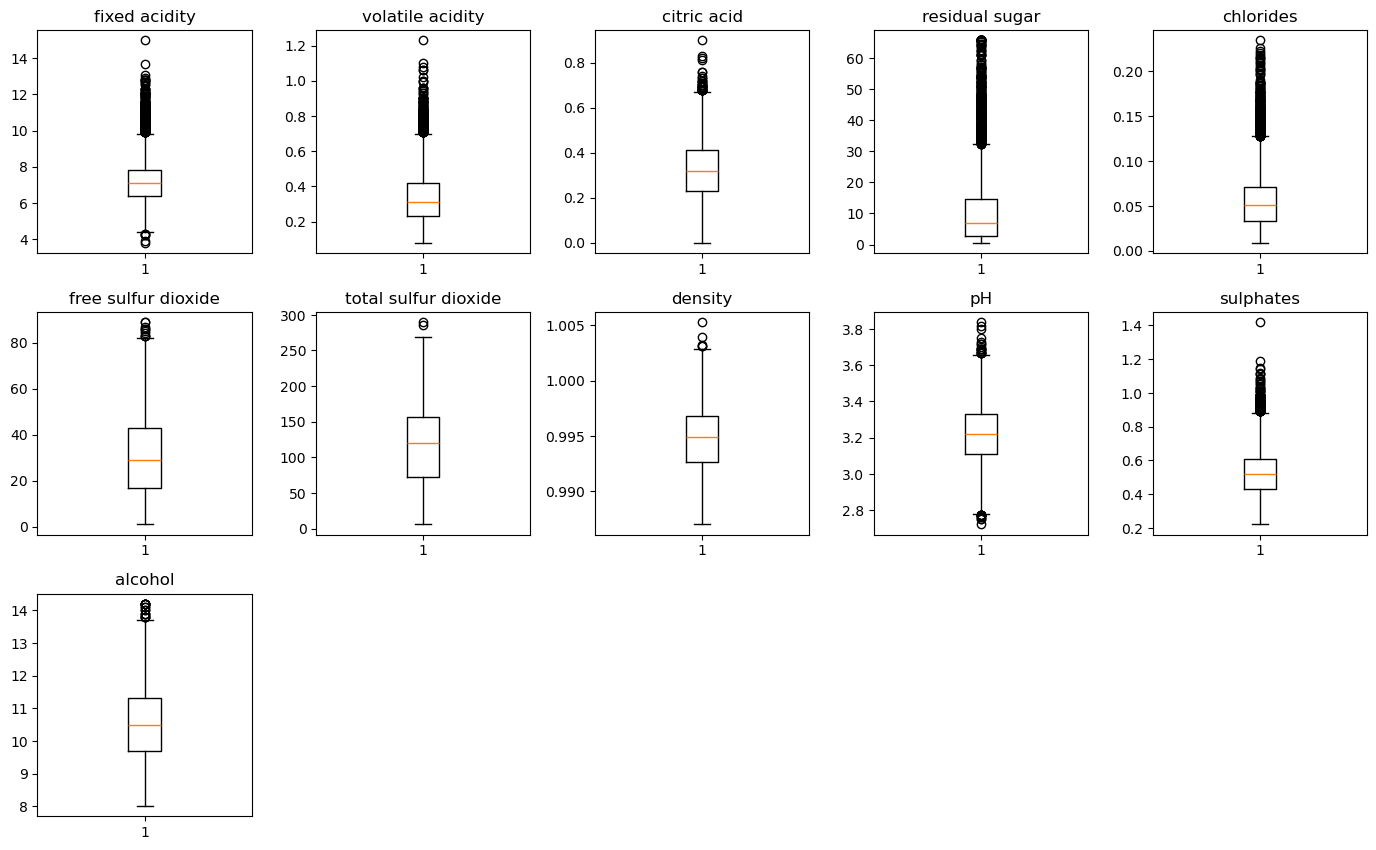

In [205]:
print("Box plots for train_data_set before filtering outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_total_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(X_TrainData[col])
        plt.title(col)

plt.tight_layout()
plt.show()



Box plots for test_data_set before filtering outliers


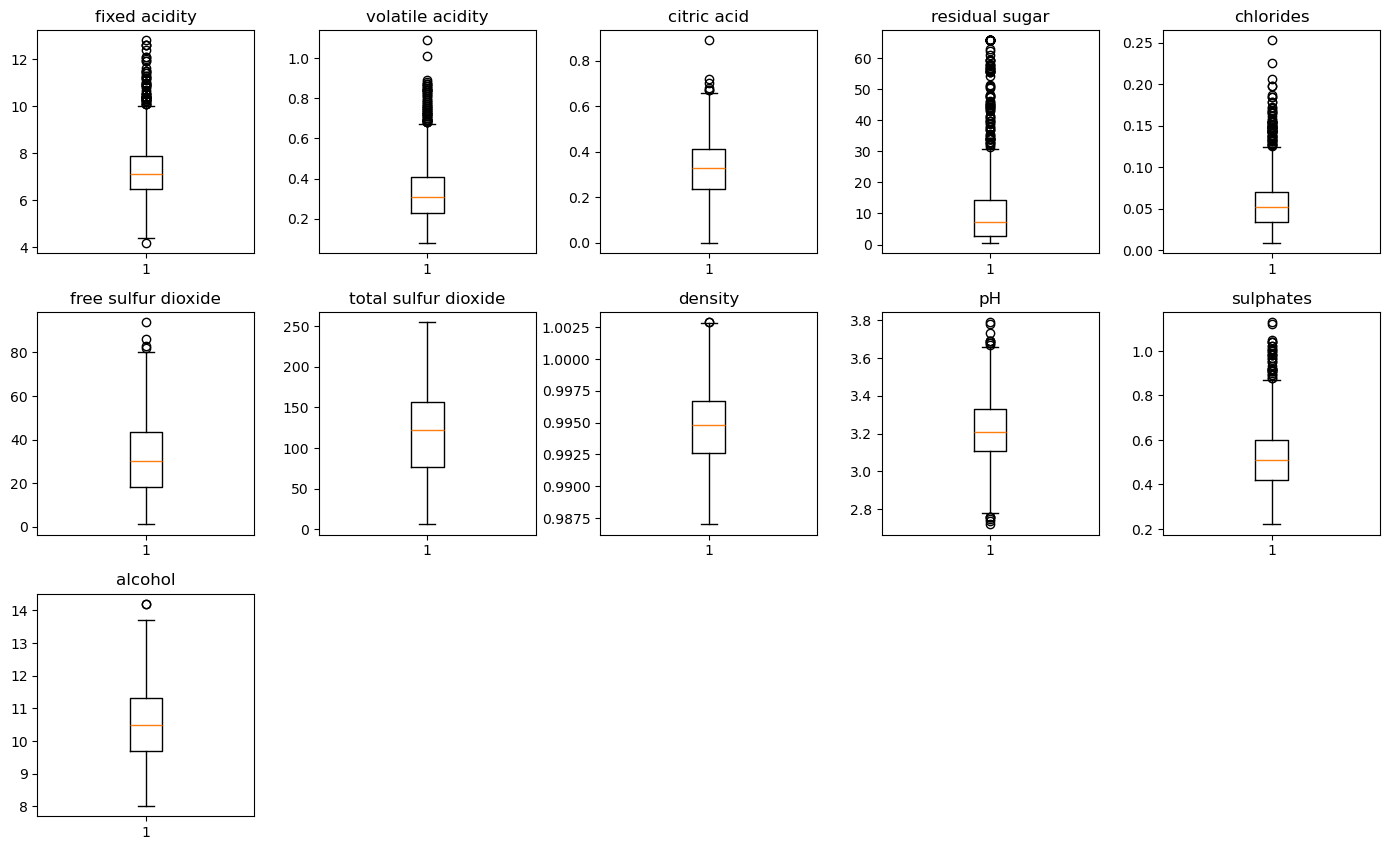

In [206]:
print("Box plots for test_data_set before filtering outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_total_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(X_TestData[col])
        plt.title(col)

plt.tight_layout()
plt.show()



In [207]:
final_dataset_train = filter_outliers(X_TrainData, iqr_total_columns)
final_dataset_test  = filter_outliers(X_TestData,  iqr_total_columns)

print(f"Train rows before: {len(X_TrainData)}  →  after: {len(final_dataset_train)}  (removed: {len(X_TrainData) - len(final_dataset_train)})")
print(f"Test  rows before: {len(X_TestData)}  →  after: {len(final_dataset_test)}  (removed: {len(X_TestData) - len(final_dataset_test)})")

Train rows before: 5197  →  after: 4490  (removed: 707)
Test  rows before: 1300  →  after: 1100  (removed: 200)


Box plots for train_data_set after filtering outliers


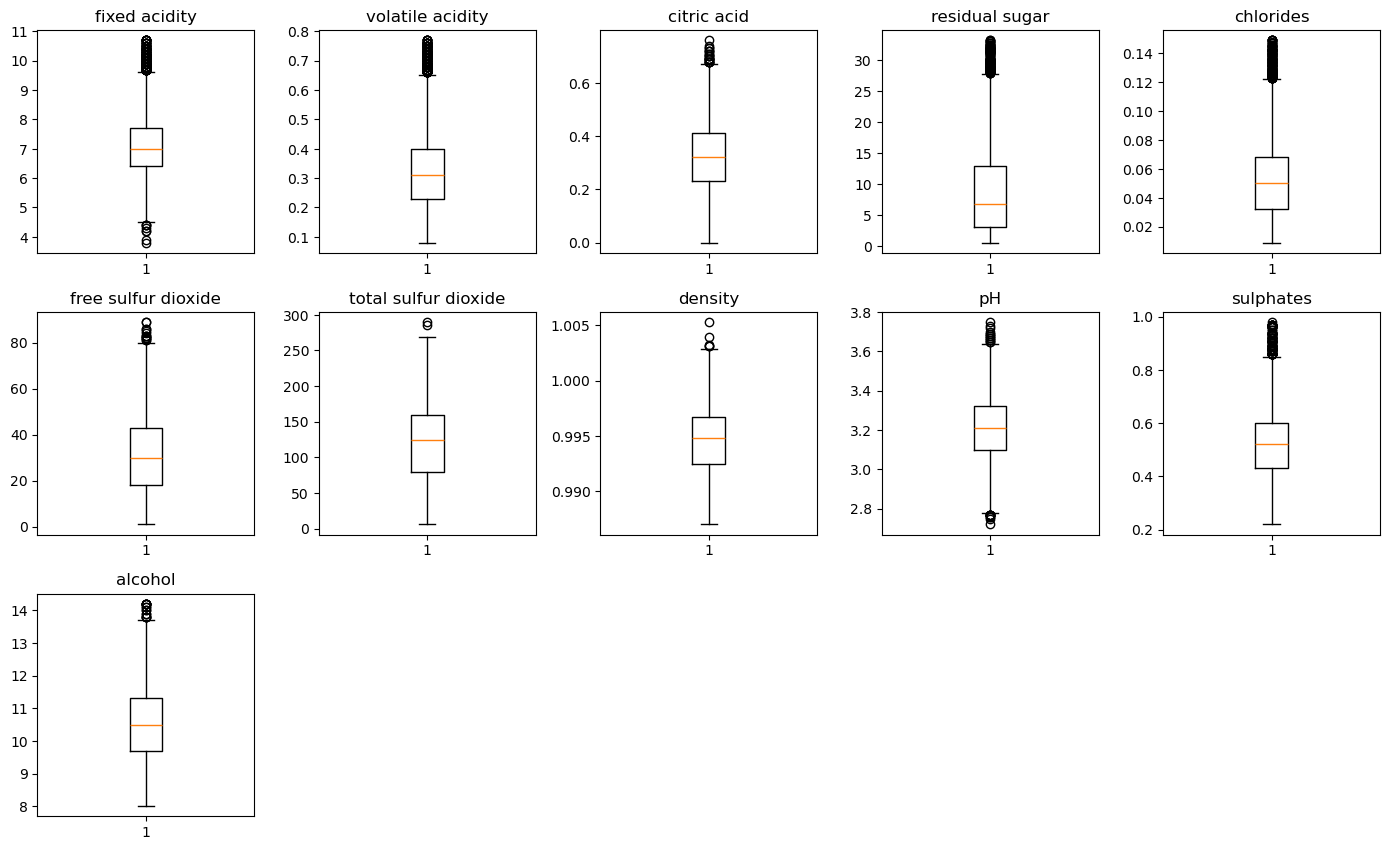

In [208]:
print("Box plots for train_data_set after filtering outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_total_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(final_dataset_train[col])
        plt.title(col)

plt.tight_layout()
plt.show()



Box plots for test_data_set after removing outliers


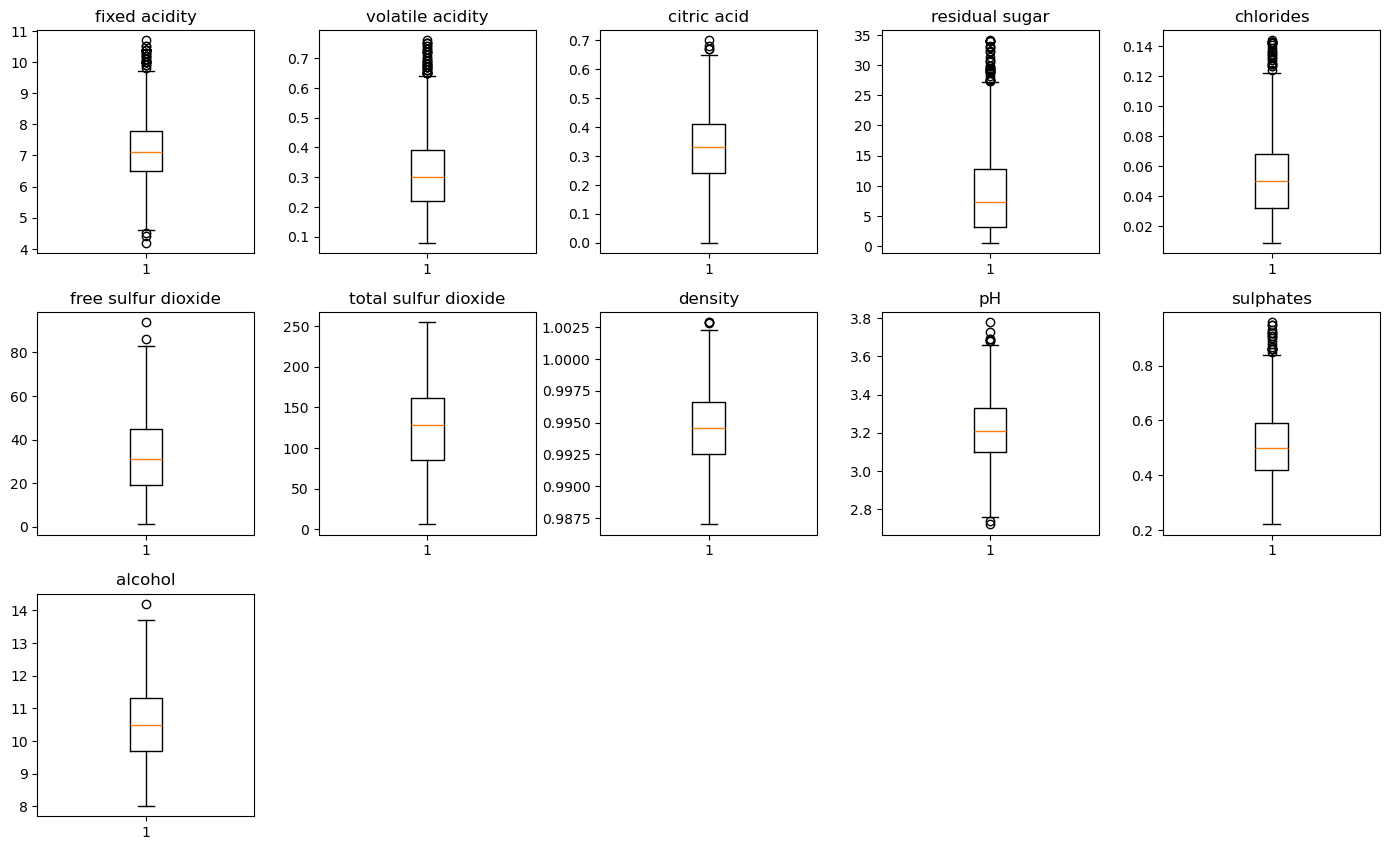

In [209]:
print("Box plots for test_data_set after removing outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_total_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(final_dataset_test[col])
        plt.title(col)

plt.tight_layout()
plt.show()

In [210]:
# All columns now I want to analyze in train_data_set

# Loop through each column and compute outliers
for col in iqr_total_columns:
    detect_outliers(final_dataset_train[col], col)

# All columns now I want to analyze in test_data_set

for col in iqr_total_columns:
    detect_outliers(final_dataset_test[col], col)


====== FIXED ACIDITY ======
Q1: 6.4
Q3: 7.7
IQR: 1.2999999999999998
Lower Bound: 4.450000000000001
Upper Bound: 9.65
Outliers: [10.7 10.2 10.5  9.8  9.9 10.2 10.2 10.3 10.4 10.  10.2  9.7  9.7 10.2
 10.4  9.9  9.8 10.3  9.8 10.1  9.7  9.9 10.2  9.9  4.2 10.1 10.4 10.2
  9.7 10.6 10.2  9.7  9.8 10.7 10.4  9.9 10.5  9.7  4.4  9.9 10.1 10.1
  3.9  9.7  9.7  9.8 10.4 10.1 10.7 10.1 10.2 10.1  4.3 10.7 10.2 10.1
 10.   9.8  9.7 10.6  9.8  9.9 10.  10.7 10.3  9.8  9.7 10.2 10.4 10.
 10.  10.1 10.3  9.8  4.4  9.7 10.6 10.   9.9  9.9 10.   9.7  9.9  9.8
  4.2 10.4 10.5  9.8 10.4  9.8 10.7  9.8 10.5 10.6 10.3 10.7  9.8 10.2
 10.1 10.2 10.2  9.9  9.8  9.9  9.8  9.9 10.5  9.7 10.  10.5 10.  10.5
 10.3 10.2 10.  10.6 10.4 10.5 10.2  3.8 10.6 10.4  9.9  9.8 10.4 10.
  4.4 10.7 10.1 10.3 10.3  9.9 10.1 10.1 10.  10.7 10.3 10.3]

====== VOLATILE ACIDITY ======
Q1: 0.23
Q3: 0.4
IQR: 0.17
Lower Bound: -0.024999999999999994
Upper Bound: 0.655
Outliers: [0.67 0.67 0.71 0.77 0.66 0.73 0.68 0.66 0.66 0.69

In [211]:
# Fill these after preprocessing
train_samples = 4490       # Number of training samples
test_samples = 1100         # Number of test samples
train_test_ratio = 0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 4490
Test samples: 1100
Split ratio: 80.0%


In [212]:
LogisticRegression_model = LogisticRegression()

# Train Base Model
print("Training LR model...")
LR_start_time = time.time()

y = y_TrainData.loc[final_dataset_train.index]

LogisticRegression_model.fit(final_dataset_train, y)

LR_predict = LogisticRegression_model.predict(final_dataset_test)

LR_training_time = time.time() - LR_start_time
print(f"✓ LR training completed in {LR_training_time:.2f}s")

LR_prob = LogisticRegression_model.predict_proba(final_dataset_test)

Training LR model...
✓ LR training completed in 0.23s


In [213]:
cm1 = confusion_matrix(y_TestData.loc[final_dataset_test.index], LR_predict)

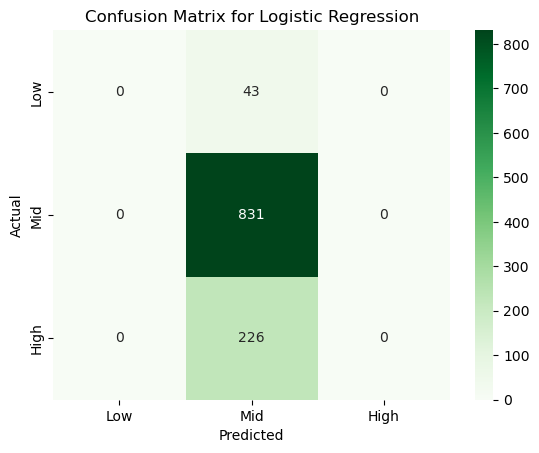

In [214]:
sns.heatmap(cm1, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Low', 'Mid', 'High'], 
            yticklabels=['Low', 'Mid', 'High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [215]:
y_test = y_TestData.loc[final_dataset_test.index]

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, LR_predict, target_names=["Low", "Mid", "High"]))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.76      1.00      0.86       831
        High       0.00      0.00      0.00       226

    accuracy                           0.76      1100
   macro avg       0.25      0.33      0.29      1100
weighted avg       0.57      0.76      0.65      1100



In [216]:
def evaluate_metrics(y_true, y_pred,y_prob):

    metrics = {}

    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    auc = roc_auc_score(y_true, y_prob, multi_class="ovr")
    print("ROC AUC:", auc)

    precision = precision_score(y_true, y_pred, average="weighted")
    print("Precision:", precision)

    recall = recall_score(y_true, y_pred, average="weighted")
    print("Recall:", recall)

    f1score = f1_score(y_true, y_pred, average="weighted")
    print("F1 Score:", f1score)

    matthews_corcoef = matthews_corrcoef(y_true, y_pred)
    print("Matthews Correlation Coefficient:", matthews_corcoef)

    metrics['accuracy_score'] = acc
    metrics['roc_auc'] = auc
    metrics['precision'] = precision
    metrics['recall'] = recall
    metrics['f1_score'] = f1score
    metrics['matthews_correlation'] = matthews_corcoef

    return metrics

In [217]:
print("Metrics for Logistic Regression:")
LR_metrics = evaluate_metrics(y_test, LR_predict,LR_prob)

Metrics for Logistic Regression:
Accuracy: 0.7554545454545455
ROC AUC: 0.5313077895804369
Precision: 0.570711570247934
Recall: 0.7554545454545455
F1 Score: 0.6502151499458595
Matthews Correlation Coefficient: 0.0


In [218]:
DecisionTreeClassifier_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10, 
    random_state=42,
    min_samples_split=50,
    )


DecisionTreeClassifier_model.fit(final_dataset_train, y)

DT_Predict = DecisionTreeClassifier_model.predict(final_dataset_test)
DT_Prob = DecisionTreeClassifier_model.predict_proba(final_dataset_test)

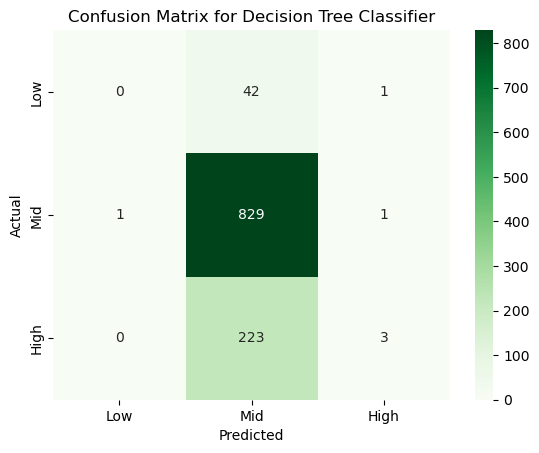

In [219]:
cm2 = confusion_matrix(y_test, DT_Predict)

sns.heatmap(cm2, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Low','Mid','High'], 
            yticklabels=['Low','Mid','High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [220]:
print("Classification Report for Decision Tree Regression:")
print(classification_report(y_test, DT_Predict, target_names=["Low","Mid","High"]))

Classification Report for Decision Tree Regression:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.76      1.00      0.86       831
        High       0.60      0.01      0.03       226

    accuracy                           0.76      1100
   macro avg       0.45      0.34      0.30      1100
weighted avg       0.70      0.76      0.66      1100



In [221]:
print("Metrics for Decision Tree Classifer:")
DT_metrics = evaluate_metrics(y_test, DT_Predict,DT_Prob)

Metrics for Decision Tree Classifer:
Accuracy: 0.7563636363636363
ROC AUC: 0.49457945250348173
Precision: 0.6957332557753033
Recall: 0.7563636363636363
F1 Score: 0.6560085005903188
Matthews Correlation Coefficient: 0.06275521107952722


In [222]:
KNeighborsClassifier_model = KNeighborsClassifier(
    n_neighbors=7
)

KNeighborsClassifier_model.fit(final_dataset_train, y)
KNN_Predict = KNeighborsClassifier_model.predict(final_dataset_test)
KNN_Prob = KNeighborsClassifier_model.predict_proba(final_dataset_test)

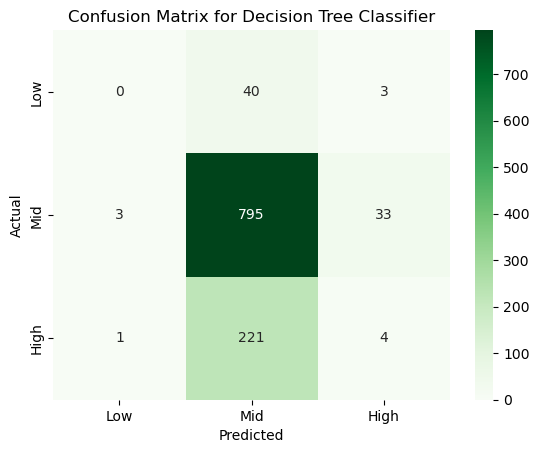

In [223]:
cm3 = confusion_matrix(y_test, KNN_Predict)

sns.heatmap(cm3, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Low','Mid','High'], 
            yticklabels=['Low','Mid','High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [224]:
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, KNN_Predict, target_names=["Low","Mid","High"]))

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.75      0.96      0.84       831
        High       0.10      0.02      0.03       226

    accuracy                           0.73      1100
   macro avg       0.28      0.32      0.29      1100
weighted avg       0.59      0.73      0.64      1100



In [225]:
print("Metrics for KNN Classifier:")
KNN_metrics = evaluate_metrics(y_test, KNN_Predict,KNN_Prob)

Metrics for KNN Classifier:
Accuracy: 0.7263636363636363
ROC AUC: 0.522238806316158
Precision: 0.5892825413223141
Recall: 0.7263636363636363
F1 Score: 0.6427306088606398
Matthews Correlation Coefficient: -0.037627632247230425


In [226]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(final_dataset_train, y)
GaussianNB_Pred = GaussianNB_model.predict(final_dataset_test)
GaussianNB_Prob = GaussianNB_model.predict_proba(final_dataset_test)

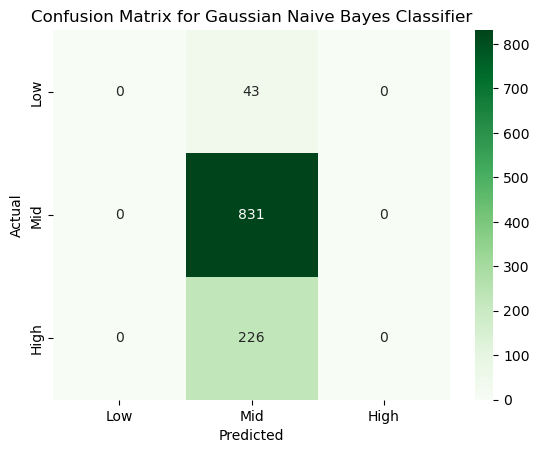

In [227]:
cm4 = confusion_matrix(y_test, GaussianNB_Pred)

sns.heatmap(cm4, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Low','Mid','High'], 
            yticklabels=['Low','Mid','High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

In [228]:
print("Classification Report for Gaussian Naive Bayes Classifier:")
print(classification_report(y_test, GaussianNB_Pred, target_names=["Low","Mid","High"]))

Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.76      1.00      0.86       831
        High       0.00      0.00      0.00       226

    accuracy                           0.76      1100
   macro avg       0.25      0.33      0.29      1100
weighted avg       0.57      0.76      0.65      1100



In [229]:
print("Metrics for Gaussian Naive Bayes Classifier:")
GaussianNB_metrics = evaluate_metrics(y_test, GaussianNB_Pred,GaussianNB_Prob)

Metrics for Gaussian Naive Bayes Classifier:
Accuracy: 0.7554545454545455
ROC AUC: 0.5533909967864475
Precision: 0.570711570247934
Recall: 0.7554545454545455
F1 Score: 0.6502151499458595
Matthews Correlation Coefficient: 0.0


In [230]:
RandomForestClassifier_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

RandomForestClassifier_model.fit(final_dataset_train, y)
RF_Predict = RandomForestClassifier_model.predict(final_dataset_test)
RF_Prob = RandomForestClassifier_model.predict_proba(final_dataset_test)

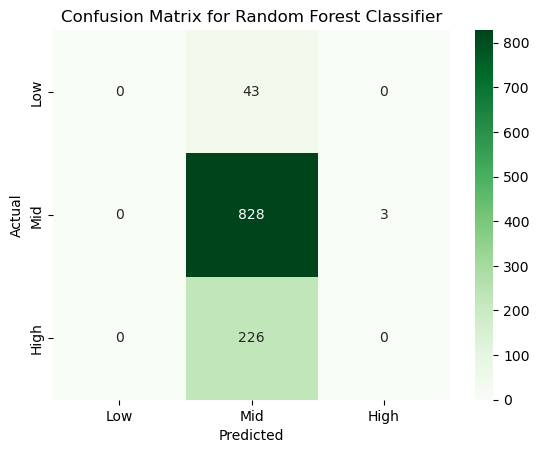

In [231]:
cm5 = confusion_matrix(y_test, RF_Predict)

sns.heatmap(cm5, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Low','Mid','High'], 
            yticklabels=['Low','Mid','High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [232]:
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, RF_Predict, target_names=["Low","Mid","High"]))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.75      1.00      0.86       831
        High       0.00      0.00      0.00       226

    accuracy                           0.75      1100
   macro avg       0.25      0.33      0.29      1100
weighted avg       0.57      0.75      0.65      1100



In [233]:
print("Metrics for Random Forest Classifier:")
RF_metrics = evaluate_metrics(y_test, RF_Predict,RF_Prob)

Metrics for Random Forest Classifier:
Accuracy: 0.7527272727272727
ROC AUC: 0.5309981300722798
Precision: 0.5702063478909422
Recall: 0.7527272727272727
F1 Score: 0.648875895888344
Matthews Correlation Coefficient: -0.026798789288620898


In [234]:
XGBClassifier_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss'
    )

XGBClassifier_model.fit(final_dataset_train, y-1)
XGB_Predict = XGBClassifier_model.predict(final_dataset_test)
XGB_Prob = XGBClassifier_model.predict_proba(final_dataset_test)

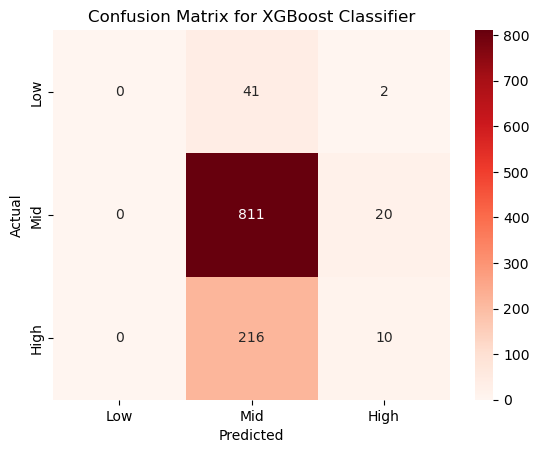

In [235]:
cm6 = confusion_matrix(y_test, XGB_Predict+1)

sns.heatmap(cm6, 
            annot=True, 
            fmt='d', 
            cmap='Reds',
            xticklabels=['Low','Mid','High'], 
            yticklabels=['Low','Mid','High'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [236]:
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, XGB_Predict+1, target_names=["Low","Mid","High"]))

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        43
         Mid       0.76      0.98      0.85       831
        High       0.31      0.04      0.08       226

    accuracy                           0.75      1100
   macro avg       0.36      0.34      0.31      1100
weighted avg       0.64      0.75      0.66      1100



In [237]:
print("Metrics for XGBoost Classifier:")
XGB_metrics = evaluate_metrics(y_test, XGB_Predict+1, XGB_Prob)

Metrics for XGBoost Classifier:
Accuracy: 0.7463636363636363
ROC AUC: 0.5229137342889095
Precision: 0.6378689989785495
Recall: 0.7463636363636363
F1 Score: 0.6611859362945002
Matthews Correlation Coefficient: 0.046816433237951934


In [238]:
pickle.dump(LogisticRegression_model, open("model/LogisticRegression_model.pkl","wb"))
pickle.dump(DecisionTreeClassifier_model, open("model/DecisionTreeClassifier_model.pkl","wb"))
pickle.dump(KNeighborsClassifier_model, open("model/KNeighborsClassifier_model.pkl","wb"))
pickle.dump(GaussianNB_model, open("model/GaussianNB_model.pkl","wb"))
pickle.dump(RandomForestClassifier_model, open("model/RandomForestClassifier_model.pkl","wb"))
pickle.dump(XGBClassifier_model, open("model/XGBClassifier_model.pkl","wb"))
